In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import os
# 한글 지원
os.putenv('NLS_LANG', '.UTF8')

In [3]:
def ipchecker():    
    import urllib 
    import re
    
    pattern = re.compile(b'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
    dyndns = urllib.request.urlopen('http://checkip.dyndns.org').read()
    
    wan = re.search(pattern, dyndns).group().decode('utf-8')
    
    return wan

In [ ]:
# base db_connect param

local_ip = '200.1.220.251:1521/xe' # 원내에서 접속할 db_ip
outside_ip = '61.35.152.103:1521/xe' # 원밖에서 접속할 db_ip
localhost = 'localhost:1521/xe'

db_id = 'begopa' 
db_pwd = 'begopa1'

academy_ip = '61.35.152.66'
db_ip = local_ip if academy_ip == ipchecker() else outside_ip

# db_ip = localhost # 집에서 본인의 개인 컴퓨터dptj  오라클에 접속할때는

In [5]:
import pickle
# load object ::
# :: file_nm
# :: columns and data_type
with open("./pickle/col2dict.pickle","rb") as fr:
    col2dict = pickle.load(fr)
with open("./pickle/table_nm_set.pickle","rb") as fr:
    table_nm_set = pickle.load(fr)

In [6]:
path = "./sg-data/"
desc_path = path + 'desc/'
col_path = path + 'col/'
origin_path = path + 'origin/'

file_list = os.listdir(origin_path)

In [7]:
# _, _, _, table_col_set_ = extract_table_columns_set(file_list[0]) # _, :: 임시로 쓰고 버리는 값.

In [8]:
# 자치구별 상권 변화지표 db 에서 한글 컬럼으로 가져오기
# oracle_to_df('자치구별 상권변화지표')
def load_to_df(kr_tbl_nm):
    for key, value in table_nm_set.items():
        if kr_tbl_nm == value:
            table_nm = key
            columns = [ arr[0] for arr in col2dict[key] ]
           
    import cx_Oracle
    import pandas as pd
    
    db = cx_Oracle.connect(db_id, db_pwd, db_ip) 
        
    sql = 'select * from ' + table_nm

    df = pd.read_sql(sql=sql, con = db) 
    df.columns = columns
    db.close
    
    return df

In [9]:
import re
import os

file_list = os.listdir(origin_path)
for file in file_list:
    kr_tbl_nm = re.findall('(\d\d).*\((.*)\)',file)
    print(kr_tbl_nm[0][0], kr_tbl_nm[0][1])

00 상권-영역
01 상권-추정유동인구
02 상권-집객시설
03 상권배후지-추정유동인구
04 상권배후지-집객시설
05 상권배후지-상주인구
06 상권-상주인구
07 상권배후지-아파트
08 상권배후지-점포
09 상권-상권변화지표
10 행정동별 상권변화지표
11 상권-추정매출
12 상권-직장인구
13 상권배후지-소득소비
14 상권배후지-직장인구
15 자치구별 상권변화지표
16 상권-아파트
18 상권-점포
19 상권배후지-추정매출


In [10]:
# col2dict

In [11]:
def multi_columns_merging(sg, sg_hl):
    a_df = load_to_df( sg )
    b_df = load_to_df( sg_hl )
    all_df = pd.merge(left=a_df, right=b_df, how='left', \
                  on=['기준_년_분기_코드','상권_코드'], sort=False)
#     del a_df, b_df
    all_df2 = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df2.dropna(axis=0)

col = ['요일']
target=['연령대','시간대']
def drop_filter(df1,target):
    df_a=df1.drop(df1.filter(regex='|'.join(target)),axis=1)
    return df_a 

def multi_merge(a_df, b_df):
    all_df = pd.merge(left=a_df, right=b_df, how='left', on=['기준_년_분기_코드','상권_코드'], sort=False)
    all_df = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df.dropna(axis=0)

def multi_columns_merging2(df, sg):
    a_df = load_to_df( sg )
    all_df = pd.merge(left=df, right=a_df, how='left', \
                  on=['기준_년_분기_코드','상권_코드'], sort=False)
#     del a_df, b_df
    all_df2 = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df2.dropna(axis=0)

In [18]:
df0=pd.read_csv('data/00.상권분석서비스(상권-영역).csv', encoding='utf-8')
# df0=load_to_df( '상권-영역' )
# df0.head()
# df0.info()
df10 = load_to_df('행정동별 상권변화지표')
# df10.head()
df15=load_to_df( '자치구별 상권변화지표' )
# df15.info()
# df15.head()

In [35]:
df0.columns
df0.info() , df10.info()
df10.astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상권_구분_코드    1496 non-null   object
 1   상권_구분_코드_명  1496 non-null   object
 2   상권_코드       1496 non-null   int64 
 3   상권_코드_명     1496 non-null   object
 4   엑스좌표_값      1496 non-null   int64 
 5   와이좌표_값      1496 non-null   int64 
 6   시군구_코드      1496 non-null   int64 
 7   행정동_코드      1496 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 93.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10857 entries, 0 to 10856
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   기준_년_분기_코드      10857 non-null  object
 1   행정동_코드          10857 non-null  object
 2   행정동_코드_명        10857 non-null  object
 3   상권_변화_지표        10857 non-null  object
 4   상권_변화_지표_명      10857 non-null  object
 5   운영_영업_개월_평균     10857 

ValueError: invalid literal for int() with base 10: '둔촌2동'

In [26]:
df10_1=df10[['행정동_코드','행정동_코드_명']]
df15_1=df15[["시군구_코드",'시군구_코드_명']]

In [32]:
map_df1=df0.merge(df15_1 , on='시군구_코드').drop_duplicates()
map_df=map_df1.merge(df10_1 , on='행정동_코드').drop_duplicates()

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [27]:
# map_df.head()

In [28]:
df20 = load_to_df('상권-상주인구')

In [29]:
df20=df20.merge(map_df , on = '상권_코드').drop_duplicates()
# df20[df20['시군구_코드_명']=='강남구']

NameError: name 'map_df' is not defined

# 인구 총 합 (유동, 상주, 직장인구수)

In [28]:
pop_df1=multi_columns_merging('상권-추정유동인구', '상권-상주인구')
# pop_df1   #유동, 상주 2962

In [29]:
target3=['월요','화요','수요','목요','금요']
target4=['토요','일요']
def add_week2(df,target3,target4):
    df['주중_유동인구_수']=df.filter(regex='|'.join(target3)).sum(axis=1)
    df['주말_유동인구_수']=df.filter(regex='|'.join(target4)).sum(axis=1)
    df_a=df.drop(df.filter(regex='|'.join(target3+target4)),axis=1)
    return df_a

# hl을 먼저 합해라!

In [30]:
pop_df2=add_week2(pop_df1,target3,target4)
pop_df2   #2962

,기준_년_분기_코드,상권_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,주중_유동인구_수,주말_유동인구_수
0,2019_1,1000001,118266,61268,56997,1806.0,851.0,955.0,785.0,0.0,785.0,86815,31451
1,2019_1,1000002,246619,147358,99261,841.0,383.0,458.0,775.0,8.0,767.0,156385,90234
2,2019_1,1000003,144480,80073,64407,1214.0,682.0,532.0,805.0,0.0,805.0,107665,36815
3,2019_1,1000012,166390,70339,96051,2586.0,1163.0,1423.0,1087.0,111.0,976.0,121377,45018
4,2019_1,1000013,65518,33437,32080,249.0,147.0,102.0,166.0,0.0,166.0,46747,18769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2019_2,1001325,109383,60736,48646,58.0,41.0,17.0,46.0,0.0,46.0,82138,27244
2986,2019_2,1001379,112258,51637,60622,308.0,153.0,155.0,160.0,45.0,115.0,82726,29532
2987,2019_2,1001380,134058,70806,63253,510.0,255.0,255.0,250.0,0.0,250.0,88801,45257
2988,2019_2,1001381,39190,18328,20862,384.0,195.0,189.0,233.0,0.0,233.0,27663,11527


In [31]:
pop_df3=multi_columns_merging2(pop_df2,'상권-직장인구')
pop_df3.head()
pop_df3.columns

Index(['기준_년_분기_코드', '상권_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_상주인구_수',
       '남성_상주인구_수', '여성_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수',
       '주중_유동인구_수', '주말_유동인구_수', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수'],
      dtype='object')

In [32]:
people_df=pop_df3.merge(map_df, on=['상권_코드']).drop_duplicates()

In [33]:
# 비율 구하기
def ratio(df,col1,col2):
    total = df[col1]+df[col2]
    total2 = df[col1]/total*100
    return total2.round(2)

In [34]:
# people_df['남성_유동인구_비율']=ratio(people_df,'남성_유동인구_수', '여성_유동인구_수')
# people_df['여성_유동인구_비율']=ratio(people_df,'여성_유동인구_수', '남성_유동인구_수')
# people_df['주중_유동인구_비율']=ratio(people_df,'주중_유동인구_수', '주말_유동인구_수')
# people_df['주말_유동인구_비율']=ratio(people_df,'주말_유동인구_수', '주중_유동인구_수')

# people_df['남성_상주인구_비율']=ratio(people_df,'남성_상주인구_수', '여성_상주인구_수')
# people_df['여성_상주인구_비율']=ratio(people_df,'여성_상주인구_수', '남성_상주인구_수')

# people_df['남성_직장인구_비율']=ratio(people_df,'남성_직장_인구_수', '여성_직장_인구_수')
# people_df['여성_직장인구_비율']=ratio(people_df,'여성_직장_인구_수', '남성_직장_인구_수')

In [35]:
people_df.columns

Index(['기준_년_분기_코드', '상권_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_상주인구_수',
       '남성_상주인구_수', '여성_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수',
       '주중_유동인구_수', '주말_유동인구_수', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '엑스좌표_값', '와이좌표_값', '시군구_코드',
       '행정동_코드', '시군구_코드_명', '행정동_코드_명'],
      dtype='object')

In [36]:
people_data=people_df[['기준_년_분기_코드','상권_구분_코드_명','상권_코드_명','시군구_코드_명', '행정동_코드_명',
                       '총_유동인구_수', '총_상주인구_수','총_직장_인구_수', '남성_유동인구_수', '여성_유동인구_수', 
                       '주중_유동인구_수','주말_유동인구_수','남성_상주인구_수', '여성_상주인구_수', 
                       '남성_직장_인구_수','여성_직장_인구_수']]
people_data   # 유동인구, 상주인구, 직장인구
# people_data = people_data.round(2)
people_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2959
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년_분기_코드  2960 non-null   object 
 1   상권_구분_코드_명  2960 non-null   object 
 2   상권_코드_명     2960 non-null   object 
 3   시군구_코드_명    2960 non-null   object 
 4   행정동_코드_명    2960 non-null   object 
 5   총_유동인구_수    2960 non-null   int64  
 6   총_상주인구_수    2960 non-null   float64
 7   총_직장_인구_수   2960 non-null   float64
 8   남성_유동인구_수   2960 non-null   int64  
 9   여성_유동인구_수   2960 non-null   int64  
 10  주중_유동인구_수   2960 non-null   int64  
 11  주말_유동인구_수   2960 non-null   int64  
 12  남성_상주인구_수   2960 non-null   float64
 13  여성_상주인구_수   2960 non-null   float64
 14  남성_직장_인구_수  2960 non-null   float64
 15  여성_직장_인구_수  2960 non-null   float64
dtypes: float64(6), int64(5), object(5)
memory usage: 393.1+ KB


In [72]:
t=people_df[['기준_년_분기_코드','상권_구분_코드_명','상권_코드_명','시군구_코드_명', '행정동_코드_명','총_가구_수']]
# t.info()
t.iloc[:,5:]=t.iloc[:,5:].astype('int64')
# t.info()
t1=t[t['기준_년_분기_코드']=='2019_1']
# t1['총_가구_수'].sum()
t

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,기준_년_분기_코드,상권_구분_코드_명,상권_코드_명,시군구_코드_명,행정동_코드_명,총_가구_수
0,2019_1,골목상권,계동길,종로구,가회동,785
1,2019_2,골목상권,계동길,종로구,가회동,785
2,2019_1,골목상권,난계로27길,종로구,숭인2동,775
3,2019_2,골목상권,난계로27길,종로구,숭인2동,775
4,2019_1,골목상권,돈화문로11가길,종로구,종로1.2.3.4가동,805
...,...,...,...,...,...,...
2955,2019_1,발달상권,서울 강북구 수유역_3,강북구,수유3동,510
2956,2019_2,발달상권,서울 강북구 수유역_3,강북구,수유3동,510
2957,2019_1,발달상권,창동역,도봉구,창4동,483
2958,2019_2,발달상권,창동역,도봉구,창4동,483


In [37]:
# people_data=people_data.astype({'총_상주인구_수': int,'총_직장_인구_수':int})
# people_data.info()
# people_data.iloc[:,5:]
people_data.iloc[:,5:] = people_data.iloc[:,5:].astype('int64')
people_data.info()
people_data[people_data['시군구_코드_명'] == '강남구']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2959
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준_년_분기_코드  2960 non-null   object
 1   상권_구분_코드_명  2960 non-null   object
 2   상권_코드_명     2960 non-null   object
 3   시군구_코드_명    2960 non-null   object
 4   행정동_코드_명    2960 non-null   object
 5   총_유동인구_수    2960 non-null   int64 
 6   총_상주인구_수    2960 non-null   int64 
 7   총_직장_인구_수   2960 non-null   int64 
 8   남성_유동인구_수   2960 non-null   int64 
 9   여성_유동인구_수   2960 non-null   int64 
 10  주중_유동인구_수   2960 non-null   int64 
 11  주말_유동인구_수   2960 non-null   int64 
 12  남성_상주인구_수   2960 non-null   int64 
 13  여성_상주인구_수   2960 non-null   int64 
 14  남성_직장_인구_수  2960 non-null   int64 
 15  여성_직장_인구_수  2960 non-null   int64 
dtypes: int64(11), object(5)
memory usage: 393.1+ KB


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,기준_년_분기_코드,상권_구분_코드_명,상권_코드_명,시군구_코드_명,행정동_코드_명,총_유동인구_수,총_상주인구_수,총_직장_인구_수,남성_유동인구_수,여성_유동인구_수,주중_유동인구_수,주말_유동인구_수,남성_상주인구_수,여성_상주인구_수,남성_직장_인구_수,여성_직장_인구_수
1550,2019_1,발달상권,서울 강남구 대치역_1,강남구,대치1동,81731,519,319,36604,45128,62870,18862,260,259,115,204
1551,2019_2,발달상권,서울 강남구 대치역_1,강남구,대치1동,90824,519,99,39574,51250,68593,22230,260,259,31,68
1552,2019_1,발달상권,서울 강남구 대치역_2,강남구,대치1동,198642,642,1138,86141,112501,150983,47658,306,336,562,576
1553,2019_2,발달상권,서울 강남구 대치역_2,강남구,대치1동,183039,642,981,77843,105197,137152,45888,306,336,565,416
1556,2019_1,발달상권,서울 강남구 학동역_2,강남구,논현2동,108575,105,3399,62280,46295,89256,19322,49,56,2080,1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,2019_2,전통시장,청담삼익시장,강남구,청담동,23154,167,60,11679,11475,16934,6220,82,85,37,23
2496,2019_1,전통시장,도곡시장,강남구,역삼2동,57463,235,164,23727,33737,40457,17008,109,126,75,89
2497,2019_2,전통시장,도곡시장,강남구,역삼2동,67888,235,58,25684,42203,46303,21588,109,126,27,31
2498,2019_1,전통시장,강남개포시장,강남구,개포2동,9396,8,237,4678,4718,6817,2579,4,4,112,125


In [38]:
people_data_en=people_data.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                       '총_유동인구_수':'totalFlowPop', '총_상주인구_수':'totalStayPop','총_직장_인구_수':'totalOffPop', '남성_유동인구_수':'menFlowCnt', '여성_유동인구_수':'womenFlowCnt', 
                       '주중_유동인구_수':'weekdayFlowCnt','주말_유동인구_비율':'weekendFlowCnt','남성_상주인구_수':'menStayCnt', '여성_상주인구_수':'womenStayCnt', 
                       '남성_직장_인구_수':'menOffRaitoCnt','여성_직장_인구_수':'womenOffCnt'})


In [39]:
people_data_en=people_data_en.replace('2019_2', '2019년2분기').replace('2019_1','2019년1분기')

In [40]:
# col2dict
people_data_en.to_csv('people_data_en.csv', index=False)

# 서비스업종 매출

In [41]:
df18=load_to_df( '상권-점포' )
df11=load_to_df( '상권-추정매출' )

In [42]:
# store_sales=multi_columns_merging('상권-점포', '상권-추정매출')
df11_18=df11.merge(df18, on=['기준_년_분기_코드','상권_코드','서비스_업종_코드','서비스_업종_코드_명']).drop_duplicates()
df11_18.head()

,기준_년_분기_코드,상권_코드,서비스_업종_코드,서비스_업종_코드_명,점포수,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2019_2,1001496,CS300043,전자상거래업,7,20931734,13998,71,29,8,...,2749,1507,496,7,7,0,0,14,1,0
1,2019_2,1001496,CS300035,인테리어,4,2000367097,48419,69,31,12,...,16005,2604,3353,4,4,0,0,25,1,0
2,2019_2,1001496,CS300032,가전제품,8,2301647043,11720,68,33,25,...,2297,2213,1309,8,8,0,0,0,0,0
3,2019_2,1001496,CS300028,화초,6,1356873015,33215,71,29,12,...,4323,2612,1314,6,6,0,0,0,0,0
4,2019_2,1001496,CS300027,섬유제품,7,2130125149,62318,62,38,11,...,8385,7121,2205,7,7,0,0,0,0,0


In [43]:
df11_18=df11_18.drop(df11_18.filter(regex='|'.join('연령대,시간대,요일')),axis=1)

In [44]:
store_sales=df11_18.merge(map_df, on='상권_코드').drop_duplicates()

In [45]:
store_sales.columns

Index(['기준_년_분기_코드', '상권_코드', '서비스_업종_코드', '서비스_업종_코드_명', '점포수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '남성_매출_금액', '여성_매출_금액', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수',
       '프랜차이즈_점포_수', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '엑스좌표_값', '와이좌표_값',
       '시군구_코드', '행정동_코드', '시군구_코드_명', '행정동_코드_명'],
      dtype='object')

In [46]:
# store_sales['주중_매출_비율']=ratio(store_sales,'주중_매출_금액','주말_매출_금액')
# store_sales['주말_매출_비율']=ratio(store_sales,'주말_매출_금액','주중_매출_금액')
# store_sales['남성_매출_비율']=ratio(store_sales,'남성_매출_금액','여성_매출_금액')
# store_sales['여성_매출_비율']=ratio(store_sales,'여성_매출_금액','남성_매출_금액')

In [47]:
store_sales.head()

,기준_년_분기_코드,상권_코드,서비스_업종_코드,서비스_업종_코드_명,점포수,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,남성_매출_비율,...,프랜차이즈_점포_수,상권_구분_코드,상권_구분_코드_명,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구_코드_명,행정동_코드_명
0,2019_2,1001496,CS300043,전자상거래업,7,20931734,13998,71,29,45,...,0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,강남구,삼성1동
1,2019_2,1001496,CS300035,인테리어,4,2000367097,48419,69,31,23,...,0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,강남구,삼성1동
2,2019_2,1001496,CS300032,가전제품,8,2301647043,11720,68,33,43,...,0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,강남구,삼성1동
3,2019_2,1001496,CS300028,화초,6,1356873015,33215,71,29,52,...,0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,강남구,삼성1동
4,2019_2,1001496,CS300027,섬유제품,7,2130125149,62318,62,38,18,...,0,U,관광특구,강남 마이스 관광특구,205310,445727,11680,11680580,강남구,삼성1동


In [48]:
store_sale_df=store_sales[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                           '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액','주말_매출_금액', '남성_매출_금액', '여성_매출_금액',
                           '주중_매출_건수', '주말_매출_건수', '남성_매출_건수','여성_매출_건수',
                           '점포수', '유사_업종_점포_수','프랜차이즈_점포_수']]
store_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95549 entries, 0 to 95548
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년_분기_코드   95549 non-null  object
 1   상권_구분_코드_명   95549 non-null  object
 2   상권_코드_명      95549 non-null  object
 3   시군구_코드_명     95549 non-null  object
 4   행정동_코드_명     95549 non-null  object
 5   서비스_업종_코드_명  95549 non-null  object
 6   당월_매출_금액     95549 non-null  int64 
 7   주중_매출_금액     95549 non-null  int64 
 8   주말_매출_금액     95549 non-null  int64 
 9   남성_매출_금액     95549 non-null  int64 
 10  여성_매출_금액     95549 non-null  int64 
 11  주중_매출_건수     95549 non-null  int64 
 12  주말_매출_건수     95549 non-null  int64 
 13  남성_매출_건수     95549 non-null  int64 
 14  여성_매출_건수     95549 non-null  int64 
 15  점포수          95549 non-null  int64 
 16  유사_업종_점포_수   95549 non-null  int64 
 17  프랜차이즈_점포_수   95549 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 13.9+ MB


In [49]:
store_sale_df

,기준_년_분기_코드,상권_구분_코드_명,상권_코드_명,시군구_코드_명,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,점포수,유사_업종_점포_수,프랜차이즈_점포_수
0,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,전자상거래업,20931734,13222929,7708805,10023144,10583097,9842,4156,8977,5016,7,7,0
1,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,인테리어,2000367097,1285669765,714697332,563756514,1380429062,32895,15524,11553,36497,4,4,0
2,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,가전제품,2301647043,1722002410,579644633,909775866,1142068634,8250,3470,4776,6524,8,8,0
3,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,화초,1356873015,1089464712,267408303,522879031,556138865,27570,5645,14364,16873,6,6,0
4,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,섬유제품,2130125149,1281196916,848928233,434448236,1695676913,38868,23450,10911,51407,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95544,2019_1,전통시장,합정시장,마포구,합정동,분식전문점,56921010,36457216,20463794,28519996,26901821,787,369,610,514,1,1,0
95545,2019_1,전통시장,합정시장,마포구,합정동,제과점,56921010,36457216,20463794,28519996,26901821,787,369,610,514,1,0,0
95546,2019_1,골목상권,대학14길,관악구,대학동,편의점,332408875,228243976,104164899,256507101,75901774,39371,17243,43272,13342,2,2,1
95547,2019_1,골목상권,대학14길,관악구,대학동,분식전문점,49119476,41738133,7381343,36973813,10602291,4497,670,4026,1074,1,1,0


In [50]:
store_sale_df_en = store_sale_df.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                                                 '서비스_업종_코드_명':'serviceKind', '당월_매출_금액':'monthSales',
                                                 '주중_매출_금액':'weekdaySales', '주말_매출_금액':'weekendSales', '남성_매출_금액':'menSales', '여성_매출_금액':'womenSales', 
                                                 '주중_매출_건수':'weekdaySalesCnt', '주말_매출_건수':'weekendSalesCnt', '남성_매출_건수':'menSalesCnt','여성_매출_건수':'womenSalesCnt',
                                                 '점포수':'storeCnt','유사_업종_점포_수':'similerStoreCnt','프랜차이즈_점포_수':'franchiseCnt'})
store_sale_df_en.columns

Index(['yesrSe', 'sgSeCdName', 'sgCdName', 'guName', 'dongName', 'serviceKind',
       'monthSales', 'weekdaySales', 'weekendSales', 'menSales', 'womenSales',
       'weekdaySalesCnt', 'weekendSalesCnt', 'menSalesCnt', 'womenSalesCnt',
       'storeCnt', 'similerStoreCnt', 'franchiseCnt'],
      dtype='object')

In [51]:
store_sale_df_en.to_csv('store_sale_df_en.csv', index=False)

In [52]:
test=store_sale_df.groupby(['기준_년_분기_코드','상권_구분_코드_명','시군구_코드_명']).sum().reset_index()
tess=test[test['기준_년_분기_코드']=='2019_1']
tess['상권_구분_코드_명'].unique()
test

,기준_년_분기_코드,상권_구분_코드_명,시군구_코드_명,당월_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,점포수,유사_업종_점포_수,프랜차이즈_점포_수
0,2019_1,골목상권,강남구,541090334983,396866655185,144223679798,241853179982,230147903536,14623441,4273116,9628317,8111038,8966,7890,586
1,2019_1,골목상권,강동구,293158986928,217123089166,76035897762,152694437725,125878544718,10902052,4214455,8684295,6180103,7390,6610,636
2,2019_1,골목상권,강북구,153009447709,109193365406,43816082303,75841003833,70899715219,6133272,2558976,4705900,3901535,4294,3792,286
3,2019_1,골목상권,강서구,325848258074,239311605271,86536652803,164706954899,133677119893,11358191,4545732,9099718,6488682,7798,7057,622
4,2019_1,골목상권,관악구,324543226091,232215900740,92327325351,175556827378,139003048779,16462959,7052393,14321933,9029200,7716,6929,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2019_2,전통시장,용산구,45891099589,32621407280,13269692309,17091664892,24819513171,1402663,593310,807963,1112515,844,767,31
154,2019_2,전통시장,은평구,36556331586,27191227116,9365104470,14337553134,20106397766,1176480,475250,716886,910569,748,693,23
155,2019_2,전통시장,종로구,76316600462,55019336839,21297263623,28617353316,42816272344,1609108,580808,1031383,1088980,2565,1784,29
156,2019_2,전통시장,중구,445417438451,311000607734,134416830717,166084959492,259088966087,6771229,2571160,3776084,5256553,12008,11414,161


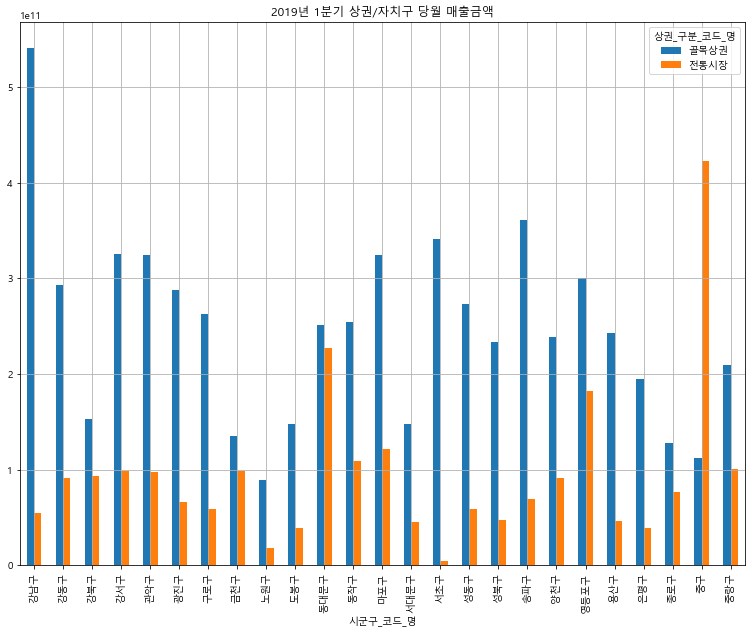

In [53]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic")

# test_5=store_sale_df[store_sale_df['기준_년_분기_코드']=='2019_1']
# t5=test_5[['상권_코드_명','시군구_코드_명','점포수']]
# t5.groupby(['상권_코드_명','시군구_코드_명'])['점포수'].sum().reset_index()
# t1 = test_df.groupby(['서비스_업종_코드_명','상권_코드_명'])['당월_매출_금액'].sum().unstack()
# t1
# t1.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 1분기 상권/자치구 당월 매출금액" )
# plt.show()

test_1=test[test['기준_년_분기_코드']=='2019_1']
test_df=test_1.loc[:, ['시군구_코드_명','상권_구분_코드_명','당월_매출_금액']]
test_df
t1 = test_df.groupby(['시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack().fillna('0')
t1
t1.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 1분기 상권/자치구 당월 매출금액" )
plt.show()


# import matplotlib.pyplot as plt
# plt.rc('font', family="Malgun Gothic")

# test_2=test[test['기준_년_분기_코드']=='2019_2']
# test_df2=test_2.loc[:, ['시군구_코드_명','상권_구분_코드_명','당월_매출_금액']]
# test_df2
# t2 = test_df2.groupby(['시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack()
# # t1
# t2.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 2분기 상권/자치구 당월 매출금액" )
# plt.show()


# import matplotlib.pyplot as plt
# plt.rc('font', family="Malgun Gothic")

# s1=test.loc[:, ['기준_년_분기_코드','시군구_코드_명','상권_구분_코드_명','당월_매출_금액']] #.sort_values(by=['시군구_코드_명','기준_년_분기_코드'])

# s1
# s2 = s1.groupby(['기준_년_분기_코드','시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack().sort_values(by=['시군구_코드_명'])
# s2
# s2.plot(kind='bar', grid=True, figsize=(15,15) ,title="2019년 상권/자치구 당월 매출금액" )
# plt.show()



In [54]:
df100=store_sales[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                           '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액','주말_매출_금액', '남성_매출_금액', '여성_매출_금액',
                           '점포수', '유사_업종_점포_수','프랜차이즈_점포_수']]

df100

,기준_년_분기_코드,상권_구분_코드_명,상권_코드_명,시군구_코드_명,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수
0,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,전자상거래업,20931734,13222929,7708805,10023144,10583097,7,7,0
1,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,인테리어,2000367097,1285669765,714697332,563756514,1380429062,4,4,0
2,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,가전제품,2301647043,1722002410,579644633,909775866,1142068634,8,8,0
3,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,화초,1356873015,1089464712,267408303,522879031,556138865,6,6,0
4,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,섬유제품,2130125149,1281196916,848928233,434448236,1695676913,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95544,2019_1,전통시장,합정시장,마포구,합정동,분식전문점,56921010,36457216,20463794,28519996,26901821,1,1,0
95545,2019_1,전통시장,합정시장,마포구,합정동,제과점,56921010,36457216,20463794,28519996,26901821,1,0,0
95546,2019_1,골목상권,대학14길,관악구,대학동,편의점,332408875,228243976,104164899,256507101,75901774,2,2,1
95547,2019_1,골목상권,대학14길,관악구,대학동,분식전문점,49119476,41738133,7381343,36973813,10602291,1,1,0


In [55]:
# df100.groupby(['기준_년_분기_코드','상권_코드_명'])['당월_매출_금액'].sum().reset_index()
g1=store_sale_df.groupby(['기준_년_분기_코드','시군구_코드_명'])['주중_매출_금액','주말_매출_금액'].sum().reset_index()
g1.head(2)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,기준_년_분기_코드,시군구_코드_명,주중_매출_금액,주말_매출_금액
0,2019_1,강남구,2581202070136,822287813385
1,2019_1,강동구,451139565322,169005574731


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


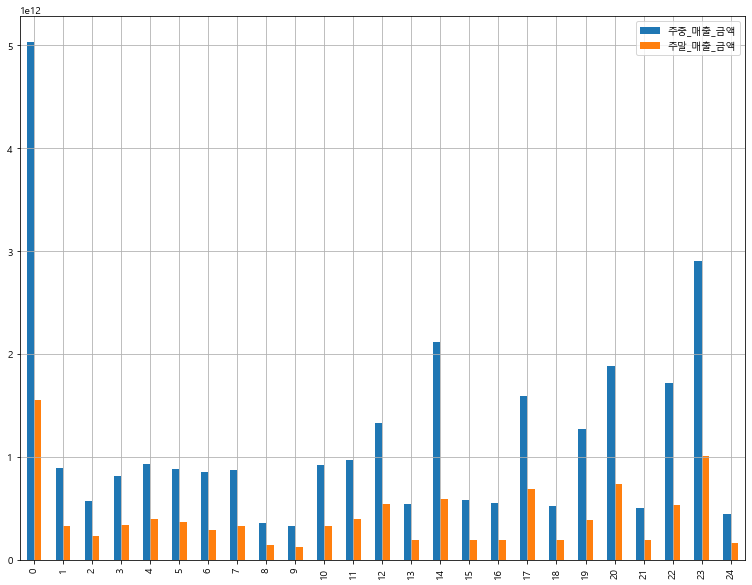

In [56]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic")
g2=g1.groupby(['시군구_코드_명'])['주중_매출_금액','주말_매출_금액'].sum().reset_index()
g2.plot(kind='bar', grid=True, figsize=(13,10))

In [ ]:
store_sale_df